# Test Scraping Reddit Comments

In [127]:
import praw
import pandas as pd
import configparser
import numpy as np

## Pull Username and password from config file

In [53]:
config = configparser.ConfigParser()
config.read('reddit.config')

['reddit.config']

# Setup PRAW Object

In [54]:
reddit = praw.Reddit(client_id=config['REDDIT_CONFIG']['client_id'],
                     client_secret=config['REDDIT_CONFIG']['client_secret'],
                     password=config['REDDIT_CONFIG']['password'],
                     user_agent=config['REDDIT_CONFIG']['user_agent'],
                     username=config['REDDIT_CONFIG']['username'])

In [55]:
for submission in reddit.subreddit('learnpython').hot(limit=10):
    print(submission.title)

Ask Anything Monday - Weekly Thread
Python list and len()
Python Quiz
send single message with telegram (or other?)
Overcoming CPython's GIL
Adding a variable to a string?
Raspberry Pi Python Email Parser
CV for Python Trainee
For loop correctly identifying letters in words, but not correctly changing letters
Please let me know a step by step learning path that I can follow and at the end of sessions, I can be reasonably confident of my abilities in python. I know programming but OOPS concepts scare the shit out of me


### Look at CFB Subreddit

In [56]:
subreddit = reddit.subreddit('cfb')

In [62]:
print(subreddit.display_name)  # Output: redditdev
print(subreddit.title)         # Output: reddit Development

CFB
The Internet's Tailgate


## List Generator of Posts

In [65]:
for submission in subreddit.hot(limit=5):
    print(submission.title)  # Output: the submission's title
    print(submission.score)  # Output: the submission's score
    print(submission.id)     # Output: the submission's ID
    print(submission.url)    # Output: the URL the submission points to

3 of 4 playoff teams return their starting QBs - Bama, Georgia, Clemson. How many of those 3 will finish the season with the starting job?
538
7s5s49
https://www.reddit.com/r/CFB/comments/7s5s49/3_of_4_playoff_teams_return_their_starting_qbs/
GT Will Unveil New Gold, Adidas Branding This Spring
200
7s5w52
http://www.myajc.com/sports/college/georgia-tech-selects-its-new-gold/gUJWaMBrGVW8j9zI15vz8I/
Pretty cool video of a Bear Bryant speech to incoming freshmen.
207
7s5qnx
https://m.youtube.com/watch?v=WVzETb9FSMw
The 12 worst college football games of 2017
162
7s64jb
https://www.sbnation.com/college-football/2018/1/22/16905578/ncaa-football-2017-season-games
Shane Beamer is leaving Georgia to become assistant head coach for the offense at Oklahoma
57
7s7u9u
https://www.reddit.com/r/CFB/comments/7s7u9u/shane_beamer_is_leaving_georgia_to_become/


# View Comments

In [159]:
submission = reddit.submission(id='3g1jfi')
line = 0
for top_level_comment in submission.comments:
    line += 1
    print(top_level_comment.body)
    if line == 5:
        break

It's always the plainest of the buttons.
[Trusted] Download

[Fast] Download 

ALWAYS NEITHER OF THESE 
"i must have chosen correct cause i got a congratulation saying i was the millionth person to download the file and to click here to claim my free ipad" 
It is said that he who holds the Sacred Chalice of Ad-block shall find the One Button.
If you need help, just use the Ask toolbar!


# CFB Post game thread comments

In [68]:
submission = reddit.submission(url='https://www.reddit.com/r/CFB/comments/7p4vrr/postgame_thread_cfp_ncg_alabama_defeats_georgia/')

In [69]:
x = 0

from collections import defaultdict

comments_dict = defaultdict()
for top_level_comment in submission.comments:
    print("=============NEW COMMMENT=============")
    print('Comment ID:',top_level_comment)
    print('Comment Body:', top_level_comment.body)
    print('Comment Author:', top_level_comment.author)
    print('Comment Author Flair CSS:',top_level_comment.author_flair_css_class)
    print('Comment Author Flair Text',top_level_comment.author_flair_text)
    print('Comment Body Controversaility:', top_level_comment.controversiality)
    print('Comment Created:', top_level_comment.created)
    print('Comment Created UTC:', top_level_comment.created_utc)
    print('Comment Depth', top_level_comment.depth)
    print('Comment Downvotes', top_level_comment.downs)
    print('Comment UpVotes', top_level_comment.ups)
    print('Comment Score', top_level_comment.score)
    print('Comment Submission', top_level_comment.submission)
    print('Comment User Reports', top_level_comment.user_reports)
    print('Comment Subreddit', top_level_comment.subreddit)
    print('Comment Post', top_level_comment.submission)
    print('Submission Title: ', submission.title)
    print('Submission Score: ', submission.score)
    
    comments_dict['Comment ID'] = top_level_comment
    comments_dict['Comment Body'] = top_level_comment
    break

=============NEW COMMMENT=============
Comment ID: dsem3pk
Comment Body: Not playing the better of your two QBs for the first 97% of the season has got to be the greatest trick play I’ve ever seen.
Comment Author: Softy_K
Comment Author Flair CSS: lsu-sheet1-row06-col07-corndog-2shtl-2rw18-2cl03
Comment Author Flair Text LSU Tigers / Corndog
Comment Body Controversaility: 0
Comment Created: 1515506177.0
Comment Created UTC: 1515477377.0
Comment Depth 0
Comment Downvotes 0
Comment UpVotes 4406
Comment Score 4406
Comment Submission 7p4vrr
Comment User Reports []
Comment Subreddit CFB
Comment Post 7p4vrr
Submission Title:  [Post-Game Thread] CFP NCG: Alabama defeats Georgia (OT) 26-23
Submission Score:  9471


## Write to CSV

In [75]:
submission.comments.replace_more(limit=1)
with open('test.csv', 'w') as f:
    for top_level_comment in submission.comments:
        f.write(top_level_comment.name)
        f.write(',')        
        comment_parsed = top_level_comment.body.replace('\n',' ').replace('\t',' ').replace(',',' ')
        if top_level_comment.author is None:
            f.write('NO AUTHOR')
        else:
            f.write(top_level_comment.author.name)
        f.write(',')
        if top_level_comment.author_flair_text is None:
            f.write('NO FLAIR')
        else:
            f.write(top_level_comment.author_flair_text)
        f.write(',')
        f.write(str(top_level_comment.score))
        f.write(',')
        f.write(comment_parsed)
        f.write('\n')

# Read Results

In [76]:
df = pd.read_csv('test.csv', index_col=0, names=['ID','User','Flair','Score','Body'])
df.head()

,User,Flair,Score,Body
ID,,,,
t1_dsem3pk,Softy_K,LSU Tigers / Corndog,4406,Not playing the better of your two QBs for the...
t1_dsel5kj,iam1whoknocks,NO FLAIR,2262,I thought this night would end with #48 murder...
t1_dselwkx,Squalor-,NO FLAIR,3738,Psh Alabama is on the down swing. The Dynasty...
t1_dsekysm,insidezone64,SEC / Coastal Carolina Chanticleers,2720,Now Bama is gonna sign all the croots because ...
t1_dsek584,Snasty728,Virginia Cavaliers / James Madison Dukes,3632,If I had a commercial for every time they said...


In [77]:
df.shape

(3589, 4)

In [82]:
df.sort_values('Score')['Body'][0]

'Cool  Alabama never deserved to be there so nothing after counts.  UCF national champs. '

# Breadth First Traversal Example

In [163]:
submission = reddit.submission(url='https://www.reddit.com/r/CFB/comments/7p4vrr/postgame_thread_cfp_ncg_alabama_defeats_georgia/')
submission.comments.replace_more(limit=1)
comment_queue = submission.comments[:]  # Seed with top-level
comment_number = 1
with open('test.csv', 'w') as f:
    while comment_queue:
        comment = comment_queue.pop(0)
        f.write(comment.name)
        f.write(',')
        f.write(str(comment.depth))
        f.write(',')
        comment_parsed = comment.body.replace('\n',' ').replace('\t',' ').replace(',',' ')
        if comment.author is None:
            f.write('NO AUTHOR')
        else:
            f.write(comment.author.name)
        f.write(',')
        if comment.author_flair_text is None:
            f.write('NO FLAIR')
        else:
            f.write(comment.author_flair_text)
        f.write(',')
        f.write(str(comment.score))
        f.write(',')
        f.write(comment_parsed)
        f.write('\n')
        #print('=============Comment Number {}============='.format(comment_number))
        #print('=========Comment Depth: {}======='.format(comment.depth))
        # print(comment.body)
        comment_queue.extend(comment.replies)
        comment_number += 1

In [164]:
df = pd.read_csv('test.csv', index_col=0, names=['ID','Depth','User','Flair','Score','Body'])

In [165]:
df.head()

,Depth,User,Flair,Score,Body
ID,,,,,
t1_dsem3pk,0,Softy_K,LSU Tigers / Corndog,4406,Not playing the better of your two QBs for the...
t1_dsel5kj,0,iam1whoknocks,NO FLAIR,2261,I thought this night would end with #48 murder...
t1_dselwkx,0,Squalor-,NO FLAIR,3733,Psh Alabama is on the down swing. The Dynasty...
t1_dsekysm,0,insidezone64,SEC / Coastal Carolina Chanticleers,2717,Now Bama is gonna sign all the croots because ...
t1_dsek584,0,Snasty728,Virginia Cavaliers / James Madison Dukes,3632,If I had a commercial for every time they said...


In [167]:
df.loc[df['Depth'] == 7].sort_values('Score').head()

,Depth,User,Flair,Score,Body
ID,,,,,
t1_dsepuo7,7,myrddyna,LSU Tigers / Oregon Ducks,28,12 0 versus his progeny coaches.
t1_dsem7z5,7,Lugia1337,Georgia Bulldogs / Rose Bowl,31,We might never know true happiness yet. Maybe ...
t1_dsen6dn,7,Cameronam,Memphis Tigers,31,He must have it was stated that Tua was gonna...


# Plot Depth/Score

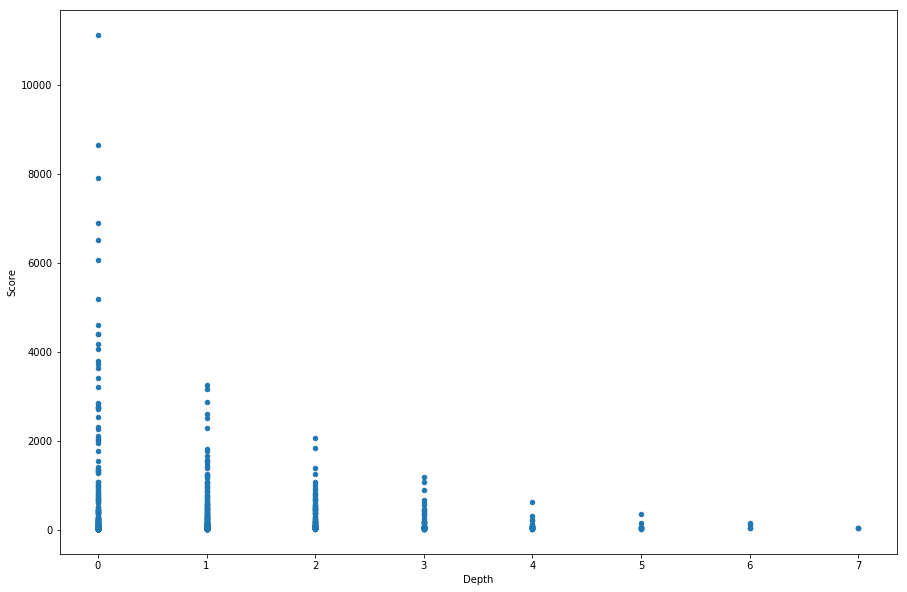

In [173]:
df.plot(x='Depth', y='Score', kind='scatter', figsize=(15,10))

### Groupby Flair

In [110]:
df['First Flair'] = df.apply(lambda x: x['Flair'].split(' / ')[0], axis=1)
#df['Second Flair'] = df.apply(lambda x: x['Flair'].split(' / ')[1], axis=1)

In [113]:
grouped_by_flair = df.groupby('First Flair')

In [131]:
average_score = grouped_by_flair.aggregate(np.average).sort_values('Score')

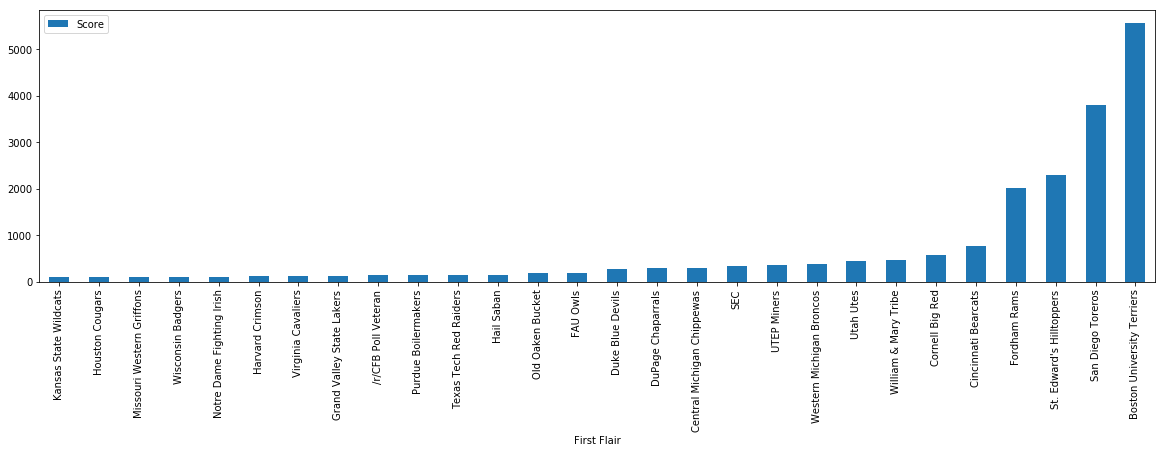

In [144]:
average_score.loc[average_score['Score']>=100].plot(y='Score', kind='bar',figsize=(20,5))

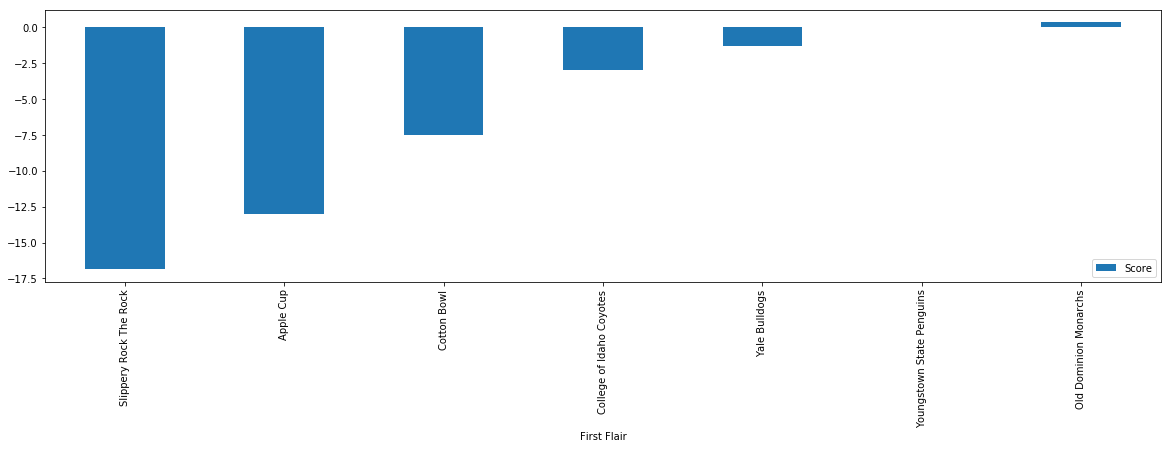

In [150]:
average_score.loc[average_score['Score']<=0.5].plot(y='Score', kind='bar',figsize=(20,5))

# College Basketball

In [152]:
# Find Threads
bb = reddit.subreddit('CollegeBasketball')

In [153]:
post_game_threads = bb.search('[Post Game Thread]')
with open('test.csv', 'w') as f:
    thread_count = 0
    for submission in post_game_threads:
        print(submission)
        print(submission.title)
        submission.comments.replace_more(limit=None)
        comment_queue = submission.comments[:]  # Seed with top-level
        while comment_queue:
            comment = comment_queue.pop(0)
            f.write(comment.name)
            f.write(',')
            f.write(str(comment.depth))
            f.write(',')
            f.write(str(submission.title))
            f.write(',')
            comment_parsed = comment.body.replace('\n',' ').replace('\t',' ').replace(',',' ')
            if comment.author is None:
                f.write('NO AUTHOR')
            else:
                f.write(comment.author.name)
            f.write(',')
            if comment.author_flair_text is None:
                f.write('NO FLAIR')
            else:
                f.write(comment.author_flair_text)
            f.write(',')
            f.write(str(comment.score))
            f.write(',')
            f.write(comment_parsed)
            f.write('\n')
            #print('=============Comment Number {}============='.format(comment_number))
            #print('=========Comment Depth: {}======='.format(comment.depth))
            # print(comment.body)
            comment_queue.extend(comment.replies)
            comment_number += 1
            thread_count += 1
            if thread_count >= 3:
                break

60e8fq
[Post Game Thread] #7 South Carolina defeats #2 Duke, 88-81


KeyboardInterrupt: 

In [154]:
post_game_threads = bb.search('[Post Game Thread]', time_filter='year')
for game in post_game_threads:
    print('{} {} {} {}'.format(game, game.score, game.comment_limit, game.title))

60e8fq 9573 2048 [Post Game Thread] #7 South Carolina defeats #2 Duke, 88-81
606fvo 8259 2048 [Post Game Thread] #8 Wisconsin upsets #1 Villanova, 65-62
63bsmz 4676 2048 [Post Game Thread] #1 North Carolina defeats #1 Gonzaga 71-65 to win the National Championship!
60bhx8 3653 2048 [Post Game Thread] #7 Michigan defeats #2 Louisville, 73-69
61dygr 4337 2048 [Post Game Thread] #4 Florida defeats #8 Wisconsin, 84-83 OT
7ion9j 4222 2048 [Post Game Thread] Boston College defeats #1 Duke, 89-84
61jhit 3666 2048 [Post Game Thread] #3 Oregon defeats #1 Kansas, 74-60
62qjrf 4095 2048 [Post Game Thread] (NCAAW) #2 Mississippi State defeats #1 Connecticut, 66-64 (OT)
61nu2d 3631 2048 [Post Game Thread] #7 South Carolina defeats #4 Florida, 77-70
6172gd 2698 2048 [Post Game Thread] #11 Xavier defeats #2 Arizona, 73-71
5yi6d6 2561 2048 [Post Game Thread] TCU defeats #1 Kansas, 85-82
5w8odo 2260 2048 [Post Game Thread] BYU defeats #1 Gonzaga 79-71
7l6zr0 2596 2048 [Post Game Thread] Wofford defeats